Plot Moroccos hydrogen strategy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
PATH = '/mnt/c/Users/scl38887/Documents/git/aldehyde/'

In [3]:
# Read data
df = pd.read_csv(PATH+'data/mar_hydrogen_strategy.csv', index_col=0)
#df.drop(['info', 'source'], axis=1, inplace=True)
df

,hydrogen_export,synfuels_export,ammonia_national,demand_national,ind_raw,info,source
year,,,,,,,
2030,7,3,3,0.5,3.1,hydrogen demand,Ersoy2022 p. 16 (MAR hydrogen strategy)
2040,32,13,13,NaN,14.1,hydrogen or synfuels demand?,Ersoy2022 p. 16 (MAR hydrogen strategy)
2050,81,33,19,18.0,20.7,hydrogen demand,Ersoy2022 p. 16 (MAR hydrogen strategy)


In [4]:
# National
ind_raw= [3.1, 14.1, 20.7]#Industry_RawMaterial
trans = [0.5, 5.0, 11.2]#Transport_Energy
ind_en= [0.0, 2.7, 5.4]#Industry_Energy
liv= [0.0, 0.0, 1.3]#Residential_Energy
storage= [0.0, 0.2, 0.6]#Electricity storage (National and Export)
# Export
syn_exp = [3.0, 13.3, 33.3]#Synfuels export PtL
h2_exp= [7.3, 32.6, 81.4]#h2 Export

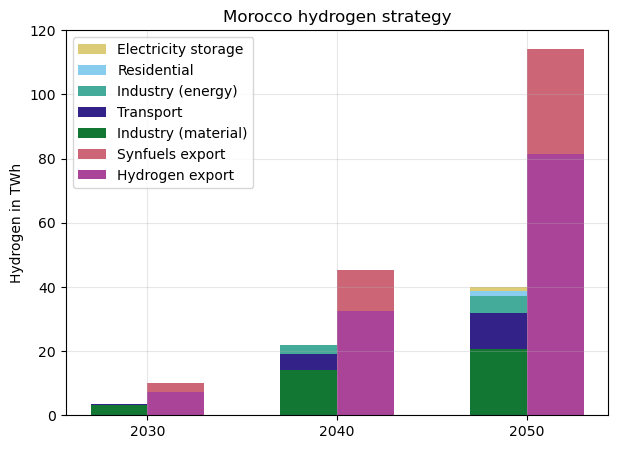

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# define if grouped or stacked
TYPE= "semistacked" # "grouped" or "stacked" or "semistacked"

# copy the data
df_plot = df

# get the index values
index = np.arange(len(df_plot['hydrogen_export']))



fig, ax = plt.subplots(figsize=(7, 5))

# create the bars for each technology (GROUPED)
# ammonia_national = plt.bar(index, df_plot['ammonia_national'], width, label='Ammonia national', color='green', alpha=0.3)
# synfuels_export = plt.bar(index + width, df_plot['synfuels_export'], width, label='Synfuels export', color='green', alpha=0.6)
# hydrogen_export = plt.bar(index + 2 * width, df_plot['hydrogen_export'], width, label='Hydrogen export', color='green', alpha=1)

if TYPE=="stacked":
    # get the width of each bar
    width = 0.3
    # create the bars for each technology (STACKED)
    demand_national = plt.bar(index, df_plot['demand_national'], width, bottom=df_plot['hydrogen_export']+df_plot['synfuels_export']+df_plot['ammonia_national'], label='Demand national', color='green', alpha=0.1)
    ammonia_national = plt.bar(index, df_plot['ammonia_national'], width, bottom=df_plot['hydrogen_export']+df_plot['synfuels_export'], label='Ammonia national', color='green', alpha=0.3)
    synfuels_export = plt.bar(index, df_plot['synfuels_export'], width, bottom=df_plot['hydrogen_export'], label='Synfuels export', color='green', alpha=0.6)
    hydrogen_export = plt.bar(index, df_plot['hydrogen_export'], width, label='Hydrogen export', color='green', alpha=1)

    plt.xticks(index, df_plot.index)

elif TYPE=="semistacked":

    # Coloring: https://davidmathlogic.com/colorblind/#%23332288-%23117733-%2344AA99-%2388CCEE-%23DDCC77-%23CC6677-%23AA4499-%23882255
    # get the width of each bar
    width = 0.3
    # create the bars for each technology (SEMISTACKED)
    storage_plot =  plt.bar(index - width/2, liv, width, bottom=np.array(ind_raw)+np.array(trans)+np.array(ind_en)+np.array(liv), label='Electricity storage', color='#DDCC77', alpha=1)
    liv_plot = plt.bar(index - width/2, liv, width, bottom=np.array(ind_raw)+np.array(trans)+np.array(ind_en), label='Residential', color='#88CCEE', alpha=1)
    ind_en_plot = plt.bar(index - width/2, ind_en, width, bottom=np.array(ind_raw)+np.array(trans), label='Industry (energy)', color='#44AA99', alpha=1)
    trans_plot = plt.bar(index - width/2, trans, width, bottom=ind_raw, label='Transport', color='#332288', alpha=1)
    ind_raw_plot = plt.bar(index - width/2, ind_raw, width, label='Industry (material)', color='#117733', alpha=1)



    synfuels_export = plt.bar(index + width/2, syn_exp, width, bottom=df_plot['hydrogen_export'], label='Synfuels export', color='#CC6677', alpha=1)
    hydrogen_export = plt.bar(index + width/2, h2_exp, width, label='Hydrogen export', color='#AA4499', alpha=1)

    plt.xticks(index, df_plot.index)


elif TYPE=="grouped":
    # get the width of each bar
    width = 0.15
    # create the bars for each technology (GROUPED)
    demand_national = plt.bar(index - width/2, df_plot['demand_national'], width, label='Demand national', color='green', alpha=0.1)
    ammonia_national = plt.bar(index + width/2, df_plot['ammonia_national'], width, label='Ammonia national', color='green', alpha=0.3)
    synfuels_export = plt.bar(index + width*1.5, df_plot['synfuels_export'], width, label='Synfuels export', color='green', alpha=0.6)
    hydrogen_export = plt.bar(index + width*2.5, df_plot['hydrogen_export'], width, label='Hydrogen export', color='green', alpha=1)

    plt.xticks(index+width, df_plot.index)

# add labels and title
plt.ylabel('Hydrogen in TWh') #TODO: is the Synfuels export demand in hydrogen or in synfuels?
plt.title('Morocco hydrogen strategy')

plt.grid(alpha=0.3)
plt.legend(loc='best')

# save the plot 
plt.savefig(PATH+'results/graphics_general/policy/mar_hydrogen_strategy_'+ TYPE +'.pdf', bbox_inches='tight')

# show the plot
plt.show()